# Neural Network for Iris dataset using Keras (Tensorflow 2.0)
**[For theory and scratch implementation, click here.](1_scratch_fake.ipynb)**

## Load Data

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [45]:
import numpy as np
X = data.data
y = data.target

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Neural Network

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [112]:
n_inputs = len(X_train[0])
n_outputs = len(set(y_train))
n_epoch = 50
l_rate = 0.1
model = Sequential()
model.add(Dense(8, activation="sigmoid", input_shape=(n_inputs,)))
model.add(Dense(n_outputs, activation="sigmoid"))
model.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=l_rate))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [113]:
y_o = np.zeros((len(y_train), n_outputs))
for i in range(len(y_train)):
    y_o[i][y_train[i]] = 1
model.fit(X_train, y_o, epochs=n_epoch, batch_size=1, validation_split=0.05)

Train on 95 samples, validate on 5 samples
Epoch 1/50
95/95 [==============================] - 1s 9ms/sample - loss: 0.2012 - val_loss: 0.2114
Epoch 2/50
95/95 [==============================] - 0s 4ms/sample - loss: 0.1696 - val_loss: 0.2037
Epoch 3/50
95/95 [==============================] - 0s 4ms/sample - loss: 0.1501 - val_loss: 0.2133
Epoch 4/50
95/95 [==============================] - 0s 4ms/sample - loss: 0.1376 - val_loss: 0.2125
Epoch 5/50
95/95 [==============================] - 0s 4ms/sample - loss: 0.1280 - val_loss: 0.2152
Epoch 6/50
95/95 [==============================] - 0s 4ms/sample - loss: 0.1213 - val_loss: 0.2093
Epoch 7/50
95/95 [==============================] - 0s 4ms/sample - loss: 0.1168 - val_loss: 0.2082
Epoch 8/50
95/95 [==============================] - 0s 4ms/sample - loss: 0.1133 - val_loss: 0.2090
Epoch 9/50
95/95 [==============================] - 0s 4ms/sample - loss: 0.1104 - val_loss: 0.2107
Epoch 10/50
95/95 [==============================] - 0s 4

In [114]:
history = model.history.history

In [115]:
import matplotlib.pyplot as plt

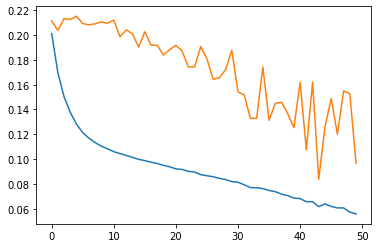

In [116]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

In [117]:
predictions = model.predict_classes(X_test)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[15  0  0]
 [ 0 22  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        22
           2       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.99      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50



## Needs Hyperparametric Tuning!